In [12]:
import pyBigWig

In [13]:
bw = pyBigWig.open("/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/data/GM12878_unstranded.bw")

In [26]:
import numpy as np
#chr8:27132554-27136153
vals = np.nan_to_num(bw.values("chr8",27133185,27136153))

In [27]:
import matplotlib.pyplot as plt
import random

In [28]:
vals.shape

(3599,)

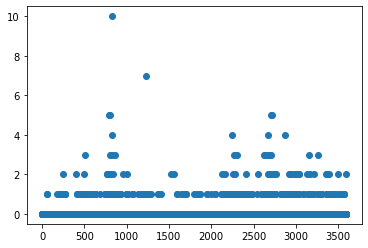

In [29]:
plt.scatter(np.arange(vals.shape[0]),vals)

In [30]:
p = np.poly1d(vals)

/users/anusri/anaconda3/lib/python3.7/site-packages/numpy/lib/polynomial.py:771: RuntimeWarning: overflow encountered in multiply
  y = y * x + p[i]


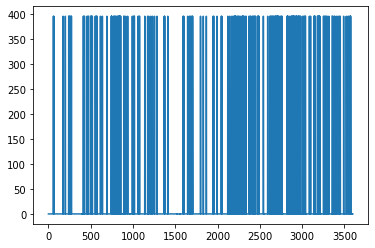

In [31]:
plt.plot(np.arange(vals.shape[0]),p(vals))

In [32]:
random.shuffle(vals)


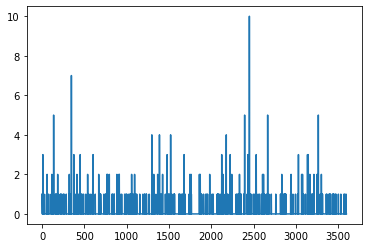

In [35]:
plt.plot(vals)

In [36]:
p = np.poly1d(vals)

/users/anusri/anaconda3/lib/python3.7/site-packages/numpy/lib/polynomial.py:771: RuntimeWarning: overflow encountered in multiply
  y = y * x + p[i]


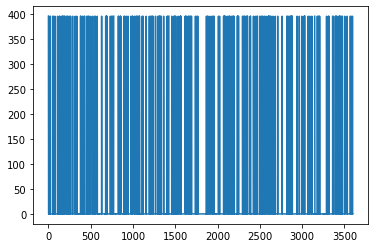

In [37]:
plt.plot(np.arange(vals.shape[0]),p(vals))

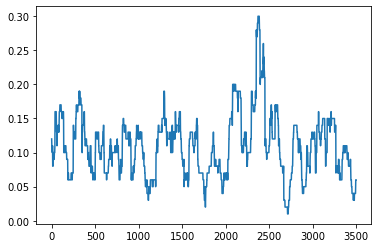

In [34]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='valid')
    return y_smooth

z = smooth(vals,100)
plt.plot(np.arange(z.shape[0]),z)

In [60]:
np.sum(vals)

911.0

In [61]:
import random

In [63]:
random.shuffle(vals)

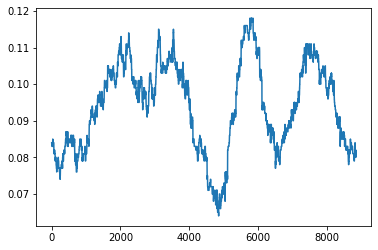

In [64]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='valid')
    return y_smooth

z = smooth(vals,1000)
plt.plot(np.arange(z.shape[0]),z)

In [54]:
np.random.multinomial(20, [1/6.]*6, size=1)


array([[3, 3, 2, 3, 5, 4]])

In [55]:
x = np.random.multinomial(911, [1/10000]*10000, size=1)


In [56]:
#plt.plot(x)
x[0].shape

(10000,)

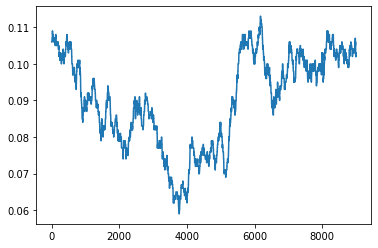

In [57]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='valid')
    return y_smooth

z = smooth(x[0],1000)
plt.plot(np.arange(z.shape[0]),z)

In [1]:
import deepdish as dd

In [2]:
data = dd.io.load("/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/bias_model/bias_predictions.h5")



/users/anusri/anaconda3/lib/python3.7/site-packages/tables/group.py:1205: UserWarning: problems loading leaf ``/coords/coords_chrom``::

  variable length strings are not supported yet

The leaf will become an ``UnImplemented`` node.
  % (self._g_join(childname), exc))


In [3]:
data["predictions"]["profs"].shape

(62929, 1000)

In [11]:
import numpy as np
dr = np.max(data["predictions"]["profs"],axis=1)

In [17]:
np.argsort(dr)[::-1][:5]

array([26446, 62676, 62470, 32538,   174])

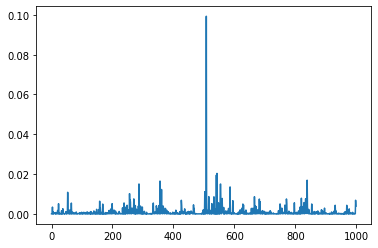

In [21]:
import matplotlib.pyplot as plt
plt.plot(data["predictions"]["profs"][62470])
plt.savefig("tn5_atac.pdf", transparent=True, dpi=300)

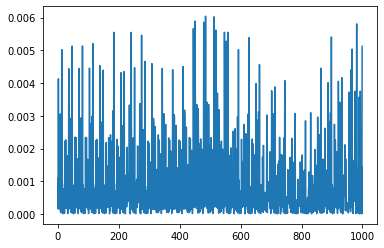

In [22]:
plt.plot(data["predictions"]["profs"][np.argmin(dr)])


In [23]:
x = np.random.multinomial(500000, [1/1000]*1000, size=1)


In [24]:
x.shape

(1, 1000)

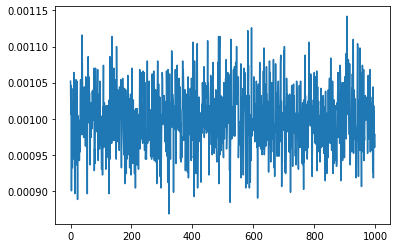

In [25]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='valid')
    return y_smooth

#z = smooth(x[0],10)
Z=x[0]
plt.plot(Z/sum(Z))

plt.savefig("ideal_atac.pdf", transparent=True, dpi=300)

In [26]:
data = dd.io.load("/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_SE/GM12878/nautilus_runs/GM12878_03.06.2022_bias_128_4_1234_0.8_fold_0/bias_model/bias_predictions.h5")


/users/anusri/anaconda3/lib/python3.7/site-packages/tables/group.py:1205: UserWarning: problems loading leaf ``/coords/coords_chrom``::

  variable length strings are not supported yet

The leaf will become an ``UnImplemented`` node.
  % (self._g_join(childname), exc))


In [27]:
dr = np.max(data["predictions"]["profs"],axis=1)

In [28]:
dr.shape

(28827,)

In [29]:
np.argsort(dr)[::-1][:5]

array([ 6067, 12287, 17033,  2965,  2369])

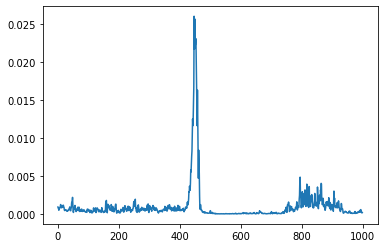

In [34]:
plt.plot(data["predictions"]["profs"][2369])
plt.savefig("dnase_atac.pdf", transparent=True, dpi=300)

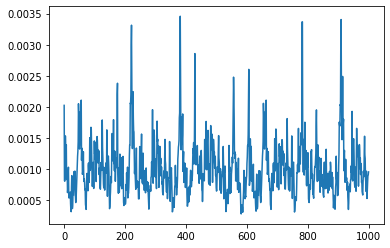

In [35]:
plt.plot(data["predictions"]["profs"][0])

In [36]:
import sklearn.cluster
import scipy.cluster.hierarchy
import scipy.stats

def cluster_matrix_indices(matrix, num_clusters):
    """
    Clusters matrix using k-means. Always clusters on the first
    axis. Returns the indices needed to optimally order the matrix
    by clusters.
    """
    if len(matrix) == 1:
        # Don't cluster at all
        return np.array([0])

    num_clusters = min(num_clusters, len(matrix))
    
    # Perform k-means clustering
    kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters)
    cluster_assignments = kmeans.fit_predict(matrix)

    # Perform hierarchical clustering on the cluster centers to determine optimal ordering
    kmeans_centers = kmeans.cluster_centers_
    cluster_order = scipy.cluster.hierarchy.leaves_list(
        scipy.cluster.hierarchy.optimal_leaf_ordering(
            scipy.cluster.hierarchy.linkage(kmeans_centers, method="centroid"), kmeans_centers
        )
    )

    # Order the peaks so that the cluster assignments follow the optimal ordering
    cluster_inds = []
    for cluster_id in cluster_order:
        cluster_inds.append(np.where(cluster_assignments == cluster_id)[0])
    cluster_inds = np.concatenate(cluster_inds)
    return cluster_inds

In [37]:
data = dd.io.load("/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/bias_model/bias_predictions.h5")


/users/anusri/anaconda3/lib/python3.7/site-packages/tables/group.py:1205: UserWarning: problems loading leaf ``/coords/coords_chrom``::

  variable length strings are not supported yet

The leaf will become an ``UnImplemented`` node.
  % (self._g_join(childname), exc))


In [ ]:
narray=data["predictions"]["profs"]

In [41]:
ind = np.arange( narray.shape[ 0 ] )
np.random.shuffle( ind )

In [42]:
clust_ind = cluster_matrix_indices(narray[ind],10)

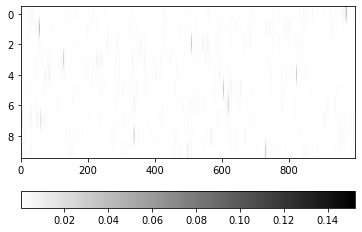

In [63]:
#plt.figure(figsize=(10,4))
dr = np.max(data["predictions"]["profs"],axis=1)

im = plt.imshow(narray[np.argsort(dr)[::-1][0:10]], cmap='binary',  aspect='auto')
#im = plt.imshow(narray[ind][clust_ind], cmap='binary',  aspect='auto')

plt.colorbar(im, orientation='horizontal')
plt.show()

In [55]:
np.max(narray[ind][clust_ind])

0.15268386900424957

In [51]:
narray

array([[5.64669084e-04, 5.00925002e-04, 1.30687619e-03, ...,
        3.14531528e-04, 7.46516671e-05, 2.72868172e-04],
       [1.70343451e-03, 1.95658693e-04, 7.09747896e-04, ...,
        4.24273185e-06, 6.68185344e-03, 6.74430485e-05],
       [1.09903398e-04, 2.14374717e-03, 3.25473884e-05, ...,
        2.68895110e-05, 5.36605003e-05, 4.73754155e-03],
       ...,
       [1.98685634e-03, 1.55037997e-05, 2.21812545e-04, ...,
        2.68859579e-03, 4.23577754e-03, 1.19933160e-03],
       [3.70495953e-04, 1.50755560e-03, 1.17122487e-03, ...,
        4.77923277e-05, 7.39206886e-03, 5.10356813e-06],
       [1.22203414e-06, 8.36213439e-06, 8.09978155e-06, ...,
        1.95087941e-05, 9.66930293e-06, 1.09375738e-04]])